## Project Name: Lending Club Case Study

### Problem statement: 
Banks are lending loans to their existing customer or new customers. Before sanctioning a loan to any customer, Banks are supposed to check the risk involved in sanctioning loan to a customer/borrower. It is important to check whether the customer can repay the loan as per schedule without any default. Default of loan payment will be loss to the Banks. At the same time, if loans are not sanctioned to many customers considering the risks, Banks will lose business. Banks need to have mechanism to identify customers/borrowers who are likely to default

### Scope of study: 
This case study is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate

### Approach: 
The case study will be approached through Exploratory Data Analysis (EDA) method which consists of the following steps

1.Data sourcing

2.Data cleaning to make the data are suitable for analysis and appropriate to arrive at correct inference/conclusion

3.Performing Univariate analysis considering individual variables and providing meaningful inference on loan acceptance/rejection

4.Performing Bivariate analysis to understand effect one variable on another variable and providing meaningful inference on loan acceptance/rejection

5.Performing the analysis using derived metrics where applicable and providing useful inference on loan


### Data sourcing : 
Data are provided in the file “loan.csv”. No additional details are expected to be analysed as part of the case study. This data are considered to be private data as they are from Bank.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
loan_df=pd.read_csv("loan.csv", low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
loan_df.shape

(39717, 111)

In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


#### From describe() it is evident that some of the columns have null values or are not useful to get meaningful insight. These columns need to be cleaned for the analysis

### 2. Data clearning

Removing columns that are having more than 60% of missing value.Even if we replace the missing values with some data it will give biased results as most of the data for that column is missing

In [5]:
loan_df_nonull = loan_df.loc[:,loan_df.isnull().sum()/len(loan_df)<0.6]

In [6]:
loan_df_nonull.shape

(39717, 54)

Dropping columns having same values across entire dataset

In [7]:
loan_df_nonull=loan_df_nonull.loc[:,loan_df_nonull.nunique()!=1]

In [8]:
loan_df_nonull.shape

(39717, 45)

Dropping columns that have all distinct values in dataset which is not useful for analysis

In [9]:
loan_df_nonull=loan_df_nonull.drop(['member_id','url','desc','emp_title','title'],axis=1)

In [10]:
loan_df_nonull.nunique()

id                         39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
purpose                       14
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc                     82
out_prncp                   1137
out_prncp_inv               1138
total_pymnt                37850
total_pymn

#### Standardising Columns and Derived metrics

Taking less than 1 year experience as 0 and 10+ years experience as 10 yrs

In [11]:
loan_df_nonull = loan_df_nonull[~loan_df_nonull.emp_length.isnull()]
loan_df_nonull['emp_exp_in_yrs']=loan_df_nonull.emp_length.apply(lambda x: '0' if x.strip()=='< 1 year' else x.replace('years','').replace('year','').replace('+','').strip())
loan_df_nonull['emp_exp_in_yrs']=loan_df_nonull['emp_exp_in_yrs'].astype('int')

In [12]:
loan_df_nonull['int_rate'] =  loan_df_nonull.int_rate.apply(lambda x:x.strip('%')).astype('float')
loan_df_nonull['term_in_months'] =  loan_df_nonull.term.apply(lambda x:x.strip('months')).astype('int')

In [13]:
loan_df_nonull =  loan_df_nonull[~loan_df_nonull.revol_util.isnull()]
loan_df_nonull['revol_util']=loan_df_nonull['revol_util'].apply(lambda x:x.strip('%')).astype('float')
loan_df_nonull['annual_inc_in_thousands']=loan_df_nonull['annual_inc'].apply(lambda x:x/1000)

In [14]:
loan_df_nonull=loan_df_nonull.drop(['emp_length','term','annual_inc'],axis=1)

In [15]:
def extract_year_month(df,colum):
    return (pd.DatetimeIndex(pd.to_datetime(df[colum],format='%b-%y')).year,pd.DatetimeIndex(pd.to_datetime(df[colum],format='%b-%y')).month)


In [16]:
loan_df_nonull['issue_d_year'],loan_df_nonull['issue_d_month']=extract_year_month(loan_df_nonull,'issue_d')
loan_df_nonull['earliest_cr_line_year'],loan_df_nonull['earliest_cr_line_month']=extract_year_month(loan_df_nonull,'earliest_cr_line')

1)As recoveries and collection_recovery_fee are variables that are used post charge off,they might not be useful in identifying the driving factors for defaulting loans

2)Dropping few that represent redundant informationa and  may not help in identifying default loans

In [17]:
loan_df_nonull=loan_df_nonull.drop(['recoveries','collection_recovery_fee','zip_code','earliest_cr_line','funded_amnt','out_prncp','total_pymnt','total_rec_late_fee'],axis=1,errors='ignore')


Dropping of the columns that comes into picture once the customer is given loan

In [18]:
loan_df_nonull=loan_df_nonull.drop(['revol_bal','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1,errors='ignore')

Filtering out the population with loan_status=Current as these loans indicate that the applicants are in the process of paying installments.Hence not useful for analysis

In [19]:
loan_df_cleaned=loan_df_nonull[loan_df_nonull.loan_status!='Current']
loan_df_cleaned.shape

(37497, 27)

In [20]:
modee=loan_df_cleaned['home_ownership'].mode()[0]
loan_df_cleaned['home_ownership']=loan_df_cleaned['home_ownership'].apply(lambda x:x.replace('NONE',modee))

In [21]:
cat_cols= [i  for i in loan_df_cleaned.columns if loan_df_cleaned[i].dtype==np.dtype('O')]
cont_cols = [i  for i in loan_df_cleaned.columns if loan_df_cleaned[i].dtype!=np.dtype('O')]


### Univariate analysis
             

#### Categorical Variables

In [22]:
cat_cols

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state']

The below plot is to understand distribution of loans based on grades

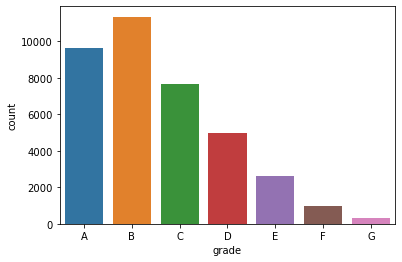

In [23]:
sns.countplot(loan_df_cleaned['grade'].sort_values())
plt.show()

#### Insight: Most of the loans are A, B and C grade loans which means they may have lower risk for default.
#### Recommendation:  Loans for applicants with grade A, B and C may have less risk of defaulting the loan

The below plot is to understand distribution of loans based on home

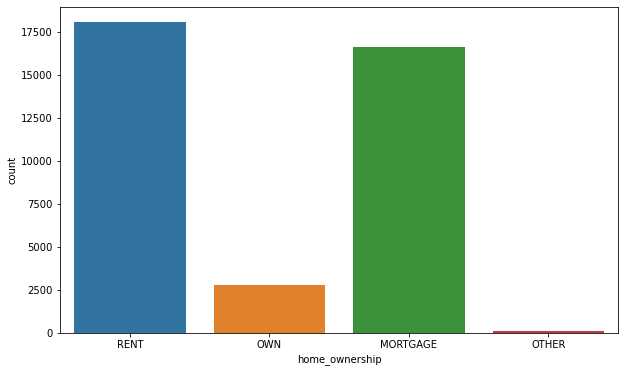

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(loan_df_cleaned['home_ownership'])
plt.show()

#### Insight: Most of loan applicants  are with rented or mortgaged house.
#### Recommendation:  There is no specific recommendation based on home ownership

The below plot is to understand distribution of loans based on verification

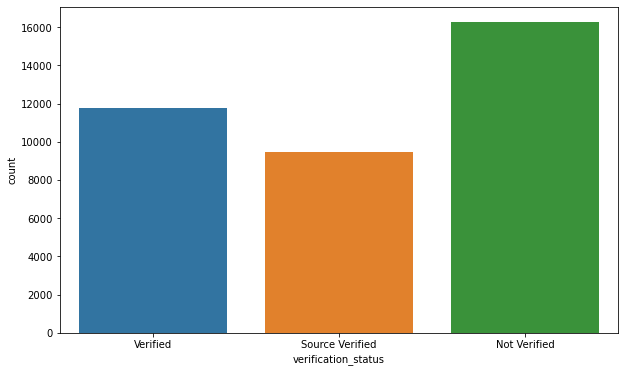

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(loan_df_cleaned['verification_status'])
plt.show()

#### Insight: it is understood that there are many loans which were not verified.
#### Recommendation:  Number of verifications should be increased to reduce number of defaults

The below plot is to understand distribution of loans based on loan status (Fully Paid or Charged off)

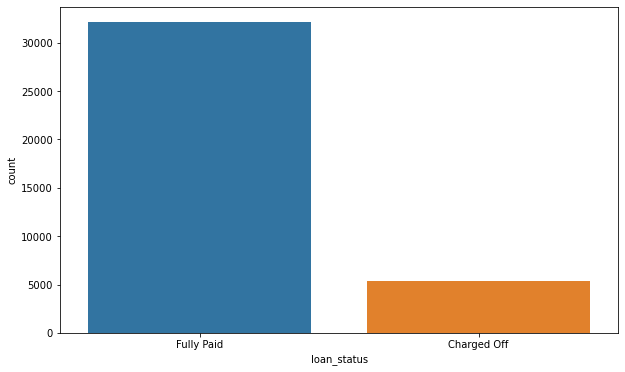

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(loan_df_cleaned['loan_status'])
plt.show()

#### Insight: There is approximately 15% charged off loans
#### Recommendation:Tighter control is required  while sanctioning loan to reduce defaults. More insights can be arrived in the comming analysis

The below plot is to understand how the loans are distributed based on purposes

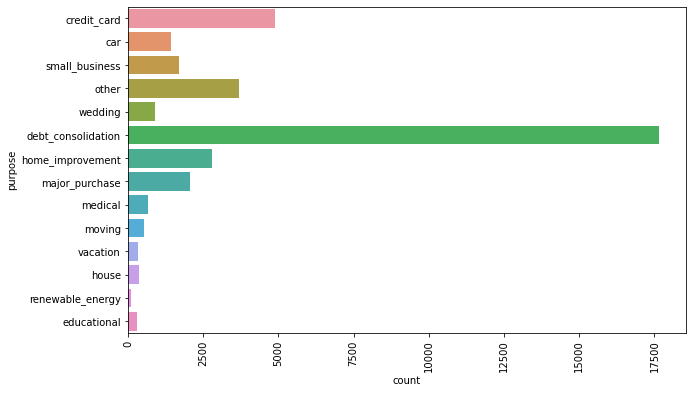

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(y=loan_df_cleaned['purpose'])
plt.xticks(rotation=90)
plt.show()

#### Insight: The plot shows majority of loans were taken for debt consolidation
#### Recommendation:Dedicated focus is required for loans applied for debt-consolidation to minimize defaults.

The below plot is to understand distribution of loans across different locations

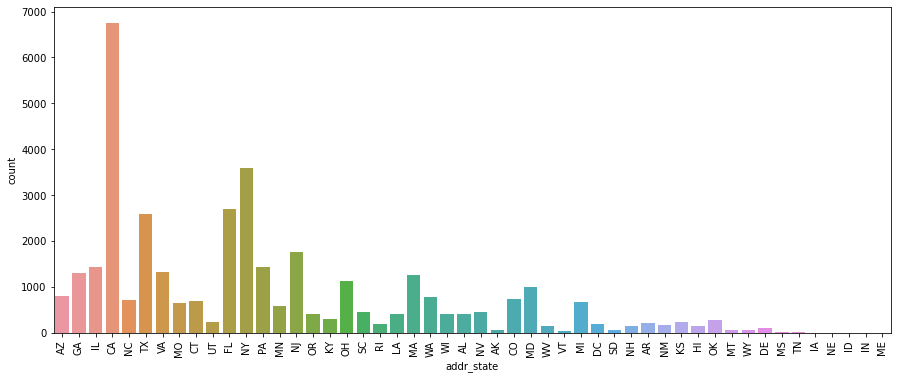

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(loan_df_cleaned['addr_state'])
plt.xticks(rotation=90)
plt.show()

#### Insight: Majority of loans were taken from residents of CA, TX, FL, NY and NJ
#### Recommendation:Dedicated focus and team for verifications are required to minimize defaults in these cities.

#### Numerical Variables

In [29]:
cont_cols

['id',
 'loan_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'total_acc',
 'pub_rec_bankruptcies',
 'emp_exp_in_yrs',
 'term_in_months',
 'annual_inc_in_thousands',
 'issue_d_year',
 'issue_d_month',
 'earliest_cr_line_year',
 'earliest_cr_line_month']

The below plot is to understand distribution based on annual income bor both fully paid and charged off loans

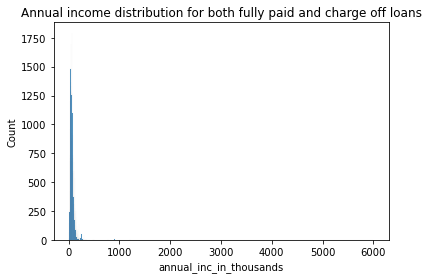

In [30]:
sns.histplot(x=loan_df_cleaned.annual_inc_in_thousands)
plt.title('Annual income distribution for both fully paid and charge off loans')
plt.show()

As the distribution is skewed, box plot is created to check for outliers

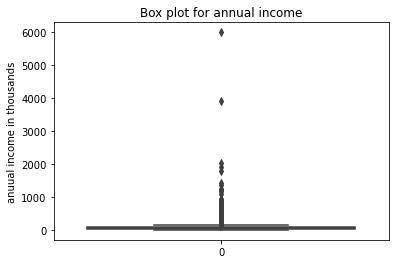

In [31]:
sns.boxplot(data=loan_df_cleaned.annual_inc_in_thousands)
plt.ylabel('anuual income in thousands')
plt.title('Box plot for annual income')
plt.show()

#### Removing the outliers by filtering out the applicants whose anuual_income is greater than 146000(upper whisker)

In [32]:
upper_whisker = loan_df_cleaned.annual_inc_in_thousands.quantile(0.75)+1.5*(loan_df_cleaned.annual_inc_in_thousands.quantile(0.75)-loan_df_cleaned.annual_inc_in_thousands.quantile(0.25))

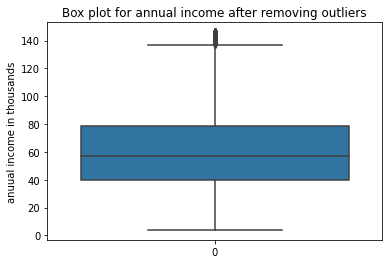

In [33]:
sns.boxplot(data=loan_df_cleaned[loan_df_cleaned.annual_inc_in_thousands<=upper_whisker].annual_inc_in_thousands)
plt.ylabel('anuual income in thousands')
plt.title('Box plot for annual income after removing outliers')
plt.show()

In [34]:
loan_df_cleaned = loan_df_cleaned[loan_df_cleaned.annual_inc_in_thousands<=upper_whisker]

The below plot is to understand distribution based on annual income bor both fully paid and charged off loans after removing outliers

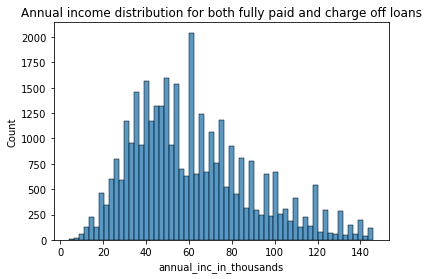

In [35]:
sns.histplot(x=loan_df_cleaned.annual_inc_in_thousands)
plt.title('Annual income distribution for both fully paid and charge off loans')
plt.show()

#### Insight: From the above distribution, most of the loan applicants have the annual income ranging from 25K to 80K.

#### Recommendation: Lending company should focus more on applicants whose salary is in the range of 25K to 75K to increase business and reduce defaults

The below plot is to understand distribution based on loan amount

<AxesSubplot:ylabel='Density'>

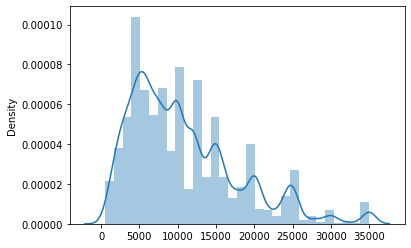

In [36]:
sns.distplot(x=loan_df_cleaned['loan_amnt'],bins=30)

#### Insight: From the above distribution, we can infer that amount of loan that most of the applicant take ranges between 4K and 15K.

#### Recommendation: Lending company should focus more on applicants whose loan amount is in the range of 4K to 15K to increase business and reduce defaults

The belot is to understand distribution based on loan term

<AxesSubplot:xlabel='term_in_months', ylabel='count'>

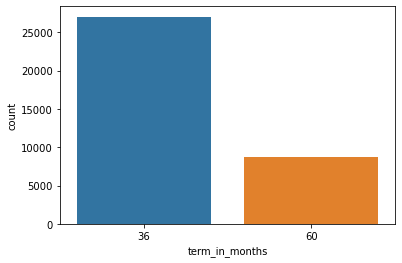

In [37]:
sns.countplot(x=loan_df_cleaned['term_in_months'])

#### Insight: From the above distribution, we can infer that most of applicants go for 36 months loan term.

#### Recommendation: Lending company should focus more on applicants who go for 36 months loan term and should have tighter control to reduce defaults

The below plot is to understand  distribution based on employees' years of experience. Note that 10+ years of experience is shown under 10 year of experience in the plot

<AxesSubplot:xlabel='emp_exp_in_yrs', ylabel='count'>

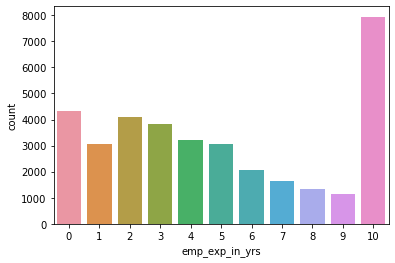

In [38]:
sns.countplot(x=loan_df_cleaned['emp_exp_in_yrs'])

#### Insight: From the above distribution, Employees with upto 5 years of experince take maximum loans

#### Recommendation: Lending company should focus more on applicants with 5 years of experience and should have tighter control for the applicants to reduce defaults


The below plot is to understand distribution based on DTI

<AxesSubplot:xlabel='dti', ylabel='Count'>

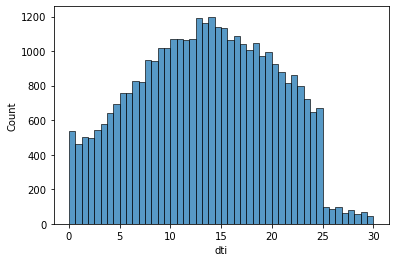

In [39]:
sns.histplot(x=loan_df_cleaned['dti'])

#### Insight: From the above plot, it is clear that the loan applicants have DTI percentage in the range of 0 to 25. it means applicants have additional capacity to pay new loans
#### Recommendation:  it is advisable not to sanction loan with higher DTI to reduce loan default

The below plot is to understand distribution based on interest rate

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

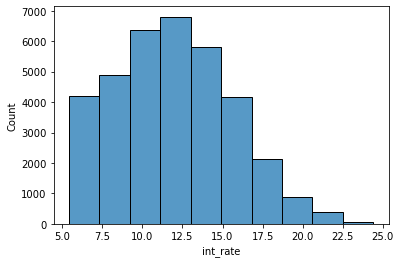

In [40]:
sns.histplot(loan_df_cleaned.int_rate,bins=10)

#### Insight: From the above plot, it is clear that upto 16% of interest rate, loan applicants are ready to take loans and beyond 16% of interest rate, applicants are less
#### Recommendation: As the interest rate beyond 16% is less and not usual, lending company should be careful while finalizing loan applicants to avoid default

The below plot is to understand distribution based on public records

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

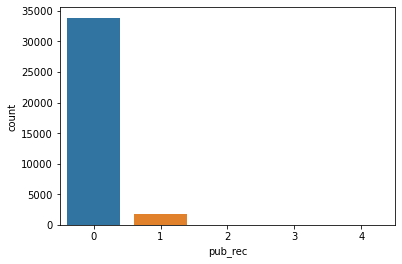

In [41]:
sns.countplot(x=loan_df_cleaned['pub_rec'])

#### Insight: There are about 6% of loan applicants with public record
#### Recommendation: Lending company should take required measures to minimize default by properly checking the public records as well

The below plot is to understand distribution based on bankruptcies

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

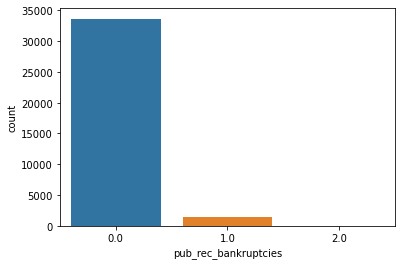

In [42]:
sns.countplot(x=loan_df_cleaned['pub_rec_bankruptcies'])

#### Insight: There are about 5% of loan applicants with bankruptcies
#### Recommendation: Lending company should take required measures to minimise default by properly checking the bankruptcies details

The below plot is to understand distribution based on loan issued years

<AxesSubplot:xlabel='issue_d_year', ylabel='count'>

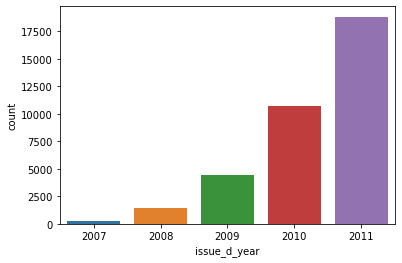

In [43]:
sns.countplot(x=loan_df_cleaned['issue_d_year'])

Observation: From the above plots, we can infer that number of loan counts are increasing with years.

The below plot is to understand distribution based on installments

<AxesSubplot:xlabel='installment', ylabel='Count'>

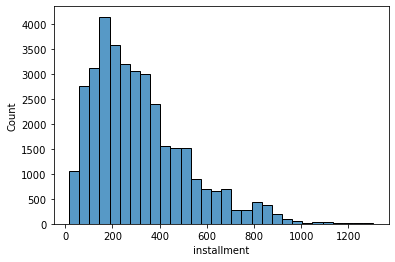

In [44]:
sns.histplot(x=loan_df_cleaned['installment'],bins=30)

#### Insight:Most of the installments are in tha range of 150 to 400 dollars

### Bivariate and Multivariate Analysis

In [45]:
cat_cols,cont_cols

(['grade',
  'sub_grade',
  'home_ownership',
  'verification_status',
  'issue_d',
  'loan_status',
  'purpose',
  'addr_state'],
 ['id',
  'loan_amnt',
  'funded_amnt_inv',
  'int_rate',
  'installment',
  'dti',
  'delinq_2yrs',
  'inq_last_6mths',
  'open_acc',
  'pub_rec',
  'total_acc',
  'pub_rec_bankruptcies',
  'emp_exp_in_yrs',
  'term_in_months',
  'annual_inc_in_thousands',
  'issue_d_year',
  'issue_d_month',
  'earliest_cr_line_year',
  'earliest_cr_line_month'])

In [46]:
def get_ratio(cols_list,agg_col,level_col,agg_func,df,agg_col_rnm):
    df_new = df.groupby(cols_list).agg({agg_col:agg_func})
    df_ratio=df_new.div(df.groupby(level_col).agg({agg_col:agg_func}),level=level_col).reset_index()
    df_ratio.rename({agg_col:agg_col_rnm},axis='columns')
    return df_ratio

The below plot is to understand distribution Loan status Vs Purpose

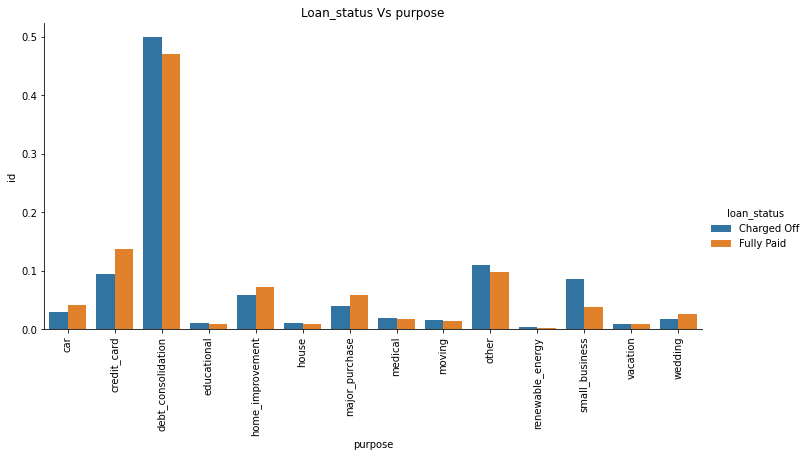

In [47]:
df_ratio=get_ratio(['loan_status','purpose'],'id','loan_status','count',loan_df_cleaned,'count')
sns.catplot(x='purpose',y='id',hue='loan_status',data=df_ratio,kind='bar',height=5,aspect=2)
plt.title("Loan_status Vs purpose")
plt.xticks(rotation=90)
plt.show()

#### Insight: Loans for Debt consolidations, Small business, others purposes and credit cards have approximately 78% of charged off applicants.

#### Recommendation: Lending company should have better control measures to minimize default loans taken for the above purposes.

The below plot is to understand distribution Loan status Vs Grade/Verification/Home ownership

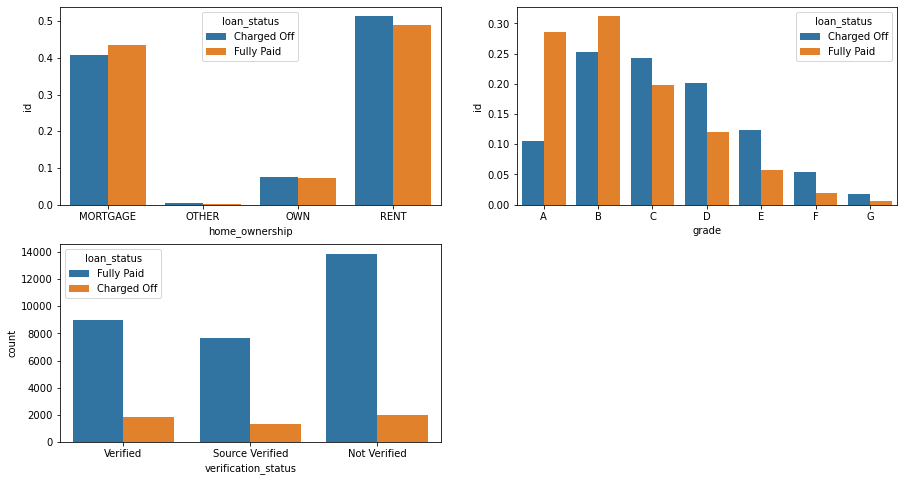

In [48]:
#from matplotlib import rcParams
#rcParams['figure.figsize']=10,10
#df_ratio=get_ratio(['loan_status','home_ownership'],'id','loan_status','count',loan_df_cleaned,'count')
#sns.catplot(x='home_ownership',y='id',hue='loan_status',data=df_ratio,kind='bar')
#plt.title("Loan_status Vs home_ownership")
#plt.xticks(rotation=90)
#plt.show()
plt.figure(figsize=(15,8))
plt.subplot(221)
df_ratio1=get_ratio(['loan_status','home_ownership'],'id','loan_status','count',loan_df_cleaned,'count')
sns.barplot(x='home_ownership',y='id',hue='loan_status',data=df_ratio1)
plt.subplot(222)
df_ratio3=get_ratio(['loan_status','grade'],'id','loan_status','count',loan_df_cleaned,'count')
sns.barplot(x='grade',y='id',hue='loan_status',data=df_ratio3)
plt.subplot(223)
sns.countplot(x='verification_status',hue='loan_status',data=loan_df_cleaned)
plt.show()

#### Insight: 
#### -Percentage of charged off loans are less only for Grade A compared to paid off loans. For grade B, percentage of charged off loans is high. For grades C, D, E, F and G, percentage of charged off loans are more than paid loans. 
#### -Most of the loans are not verified and even after verification the number of charged off loans are not less.
#### -Percentage of charged off loans are more for applicants with rented house


#### Recommendation: 
#### -Lending company to refine the grades B, C, D, E, F and G to differentiate better and to control defaults.
#### -Verification process needs to be improved and number of verification should be increased by lending company
#### -Lending company should enhance verification for application with rented house.



.

The below plot is to understand distribution loan status Vs Issued year/month

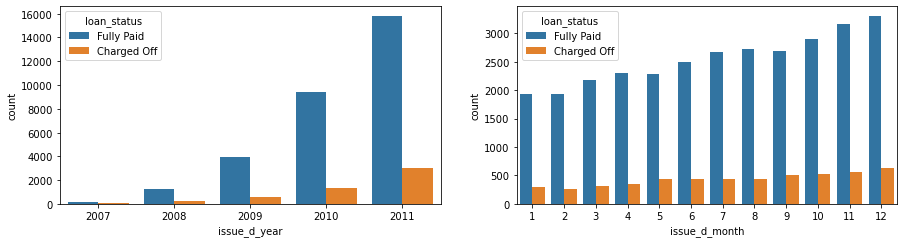

In [49]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.countplot(loan_df_cleaned['issue_d_year'],hue=loan_df_cleaned['loan_status'],data=loan_df_cleaned)
plt.subplot(222)
sns.countplot(loan_df_cleaned['issue_d_month'],hue=loan_df_cleaned['loan_status'],data=loan_df_cleaned)
plt.show()

#### Insight: From the above plot, Number of charged off and fully paid loans are increasing every year and also every month most of the time. No specific recommendation based on the above plot

The below plot is to understand distrintion Loan stats Vs interest rate / installment / DTI / Loan amount

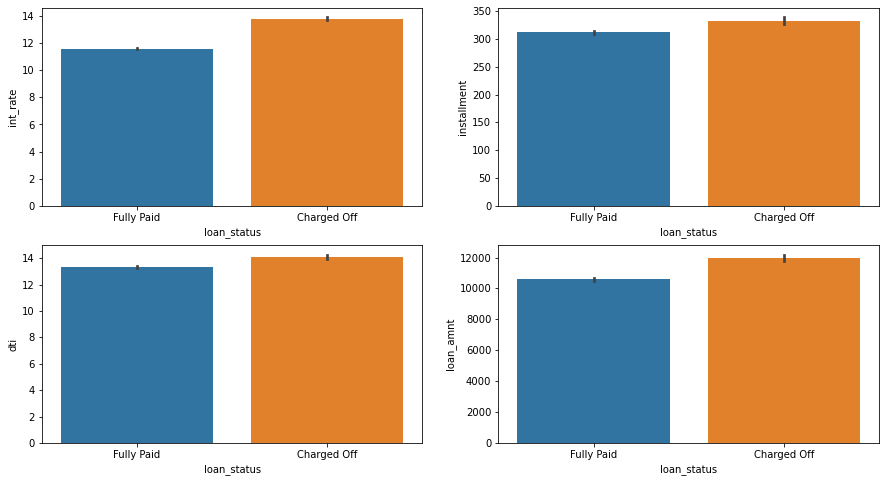

In [50]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.barplot(loan_df_cleaned['loan_status'],loan_df_cleaned['int_rate'])
plt.subplot(222)
sns.barplot(loan_df_cleaned['loan_status'],loan_df_cleaned['installment'])
plt.subplot(223)
sns.barplot(loan_df_cleaned['loan_status'],loan_df_cleaned['dti'])
plt.subplot(224)
sns.barplot(loan_df_cleaned['loan_status'],loan_df_cleaned['loan_amnt'])
plt.show()

#### Insight: 
#### -Number of charged off applicants are high compared to paid off  applicants when interest rate is high (about 2% higher) i.e from 12% to 14%.

#### -Number of charged off applicants are high compared to paid off  applicants when loan amount is high (about 2K higher)i.e from 10K-12K.

#### -Number of charged off applicants are high compared to paid off  applicants when instalment & DTI are high ie. from 13 to 14 for DTI & 300 to 350 for Installment.


#### Recommendation: 
#### -Lending company should increase scrutiny of applicants when loan amount or interest rate or DTI is high to avoid default.

The below plot is to understand loan status Vs Delinquncy / Loan term / Open accounts

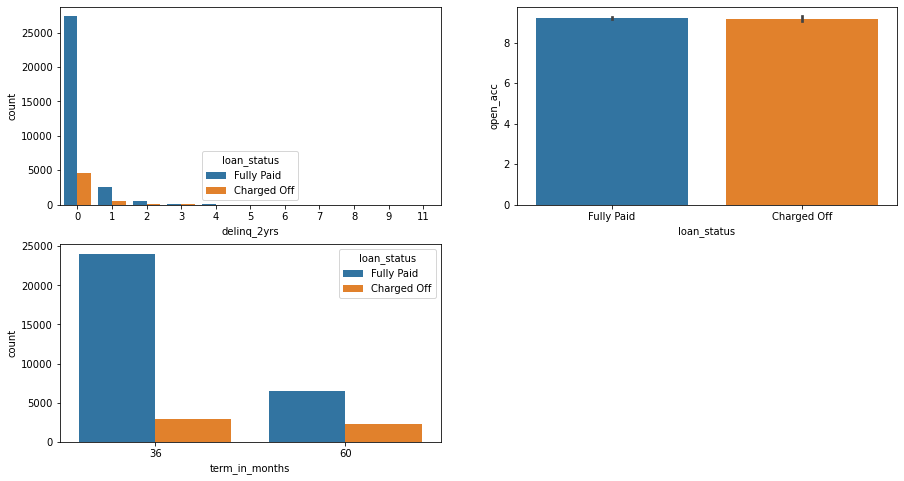

In [51]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.countplot(x=loan_df_cleaned['delinq_2yrs'],hue=loan_df_cleaned['loan_status'],data=loan_df_cleaned)
plt.subplot(222)
sns.barplot(loan_df_cleaned['loan_status'],loan_df_cleaned['open_acc'],data=loan_df_cleaned)
plt.subplot(223)
sns.countplot(x=loan_df_cleaned['term_in_months'],hue=loan_df_cleaned['loan_status'],data=loan_df_cleaned)

plt.show()

#### Insight: Number of charged off loans are more (about 40% of paid loans) when loan term is 60 months
#### -Open accounts and delinq_2yrs may not have significant impact on default loans as no of open accounts is same for both charge off and fully paid applicants and past 2yrs delinquency is less for charge off applicants.

#### Recommendation: Lending company should have better control measures to minimize default loans taken 60 months loan term.


The below plot is to understand loan status Vs Annual income / Employees experience

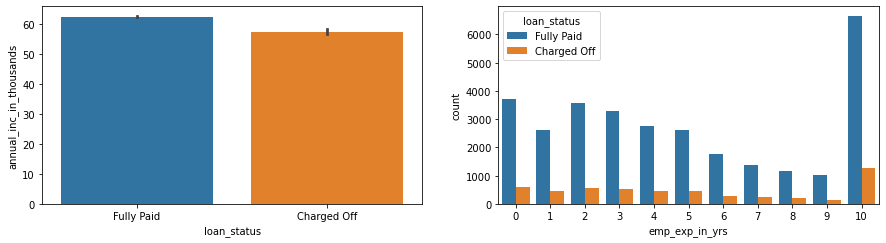

In [52]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.barplot(loan_df_cleaned['loan_status'],loan_df_cleaned['annual_inc_in_thousands'],data=loan_df_cleaned)
plt.subplot(222)
sns.countplot(x=loan_df_cleaned['emp_exp_in_yrs'],hue=loan_df_cleaned['loan_status'],data=loan_df_cleaned)

plt.show()

#### Annual income of charge off applicants are less when compared to fully paid.

The below plot is to show heat map considering multiple variables

<AxesSubplot:>

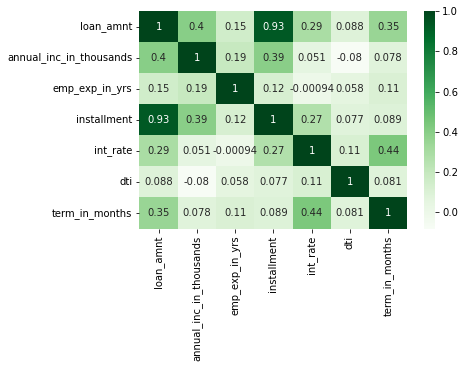

In [53]:
df_corr=loan_df_cleaned[['loan_amnt','annual_inc_in_thousands','emp_exp_in_yrs','installment','int_rate','dti','term_in_months']].corr()
sns.heatmap(df_corr,annot=True,cmap='Greens')

#### Insight: 

There is a strong correlation between loan amount and installment.Installment amount  increase with loan amount

Both interest rate and term has positive but weak correlation with loan_amount. So if the interest rate increases, loan term also increases. 
The reason for increase in month to reduce the monthly installment amount.  

There is no much relationship between DTI and other variables

There is no much relationship between Employee experience and other variables


#### Recommendation: 
Lending company should increase scrutiny of applicants when loan amount or interest rate is high to avoid default.


In [54]:
loan_df_cleaned['loan_amnt_bins']=pd.cut(x=loan_df_cleaned['loan_amnt'],bins=[0,5000,10000,15000,20000,25000,30000])
loan_df_cleaned['income_bins']=pd.cut(x=loan_df_cleaned['annual_inc_in_thousands'],bins=[0,20,40,60,80,100,120,140,160])

In [55]:
#sns.catplot(data =loan_df_cleaned,y='emp_exp_in_yrs', x='loan_amnt_bins',col='loan_status',hue='income_bins',kind='bar',height=4,aspect=2)

The below plot is to understand loan amount vs employee experience

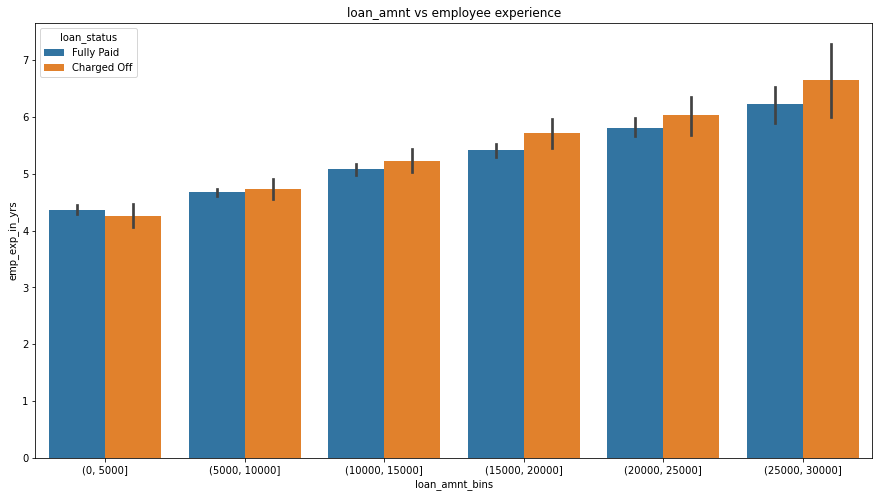

In [56]:
plt.figure(figsize=(15,8))
#sns.barplot(data =loan_df_cleaned,y='loan_amnt', x='emp_exp_in_yrs',hue='loan_status')
sns.barplot(data =loan_df_cleaned,y='emp_exp_in_yrs', x='loan_amnt_bins',hue='loan_status')
plt.title('loan_amnt vs employee experience')
plt.show()

#### Insight: Loan amount and charged off applicants are increasing with employees years of experience
#### Applicants having experience greater than 5 years and taking loan amounts greater than 15K are likely to default.

The below plot is to understand Loan amount Vs Verification status

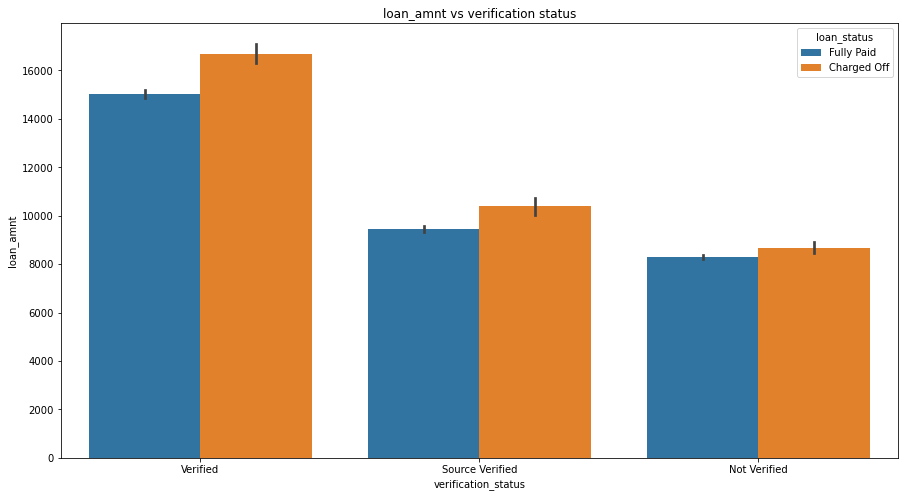

In [57]:
plt.figure(figsize=(15,8))
sns.barplot(data =loan_df_cleaned,y='loan_amnt', x='verification_status',hue='loan_status')
plt.title('loan_amnt vs verification status')
plt.show()

#### Insight: Number of charged off loan applicants are high even after verification
#### Recommendation: Verification rigor should be increased and number of verification should be increased

The below plot is to understand Loan amount Vs income

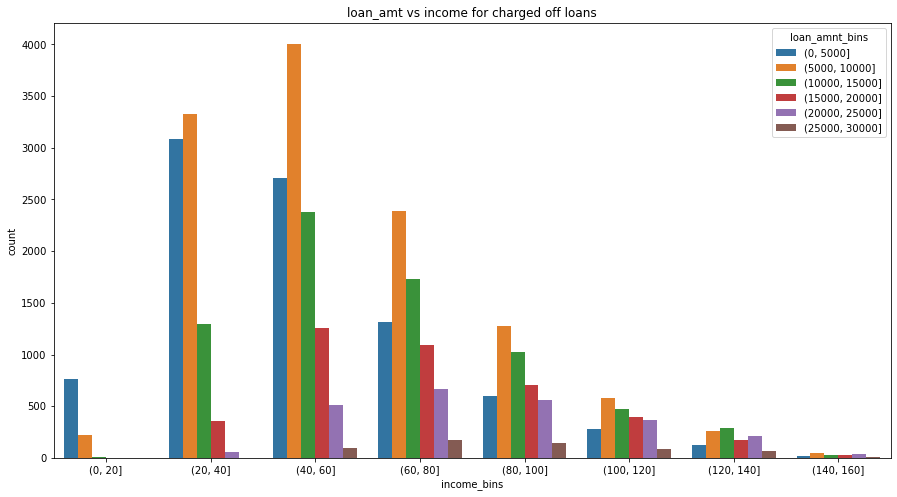

In [58]:
plt.figure(figsize=(15,8))
loan_df_cleaned['income_bins']=pd.cut(x=loan_df_cleaned['annual_inc_in_thousands'],bins=[0,20,40,60,80,100,120,140,160])
sns.countplot(x=loan_df_cleaned['income_bins'],hue=loan_df_cleaned['loan_amnt_bins'],data=loan_df_cleaned[loan_df_cleaned['loan_status']=='Charged Off'])
plt.title("loan_amt vs income for charged off loans")
plt.show()

##### Insight: Most of loan applicants are from income range of 20K to 80K for charged off loans taking loan amounts in range of 5K-10K

#### Recommendation: It is recommended to lending company to focus more on applicants whose income are ranging from 20K to 80K and improve control process to reduce defaults

The below plot is to understand Loan amount Vs open accounts

<Figure size 1080x576 with 0 Axes>

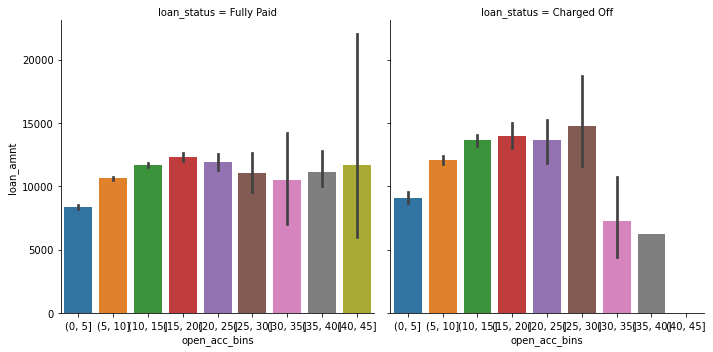

In [59]:
plt.figure(figsize=(15,8))
loan_df_cleaned['open_acc_bins']=pd.cut(loan_df_cleaned['open_acc'],bins=[0,5,10,15,20,25,30,35,40,45])
sns.catplot(x='open_acc_bins',col='loan_status',y='loan_amnt',data=loan_df_cleaned,kind='bar')

#### Insight: Most of the loan amounts for charged off loans are between 10K and 15K. Most of open accounts for charged varies from 10 to 25.

The below plot is to understand  loan amount Vs DTI

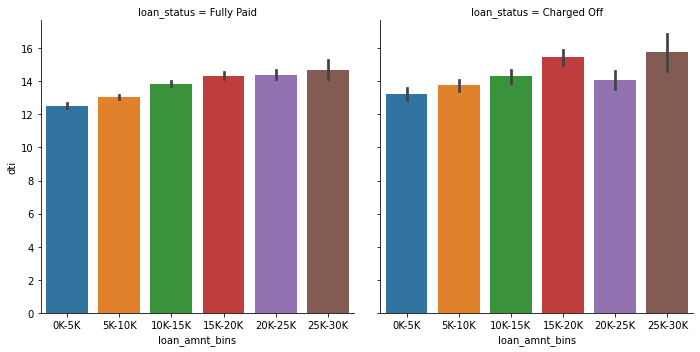

In [60]:
sns.catplot(x='loan_amnt_bins',y='dti',col='loan_status',data=loan_df_cleaned,kind='bar')
plt.xticks((0,1,2,3,4,5),('0K-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K'))
plt.show()


#### Insight: 

The increase in DTI ratio for different loan amount is marginal for charge off loans. 

The increase in DTI ratio for different loan amounts is approximately 0.5% for charged off loans except for loan amount 20K to 25K.

DTI is highest (approximately 15%) for loan amount of 26 to 30K

The below plot is to understand address state Vs Charged off loans

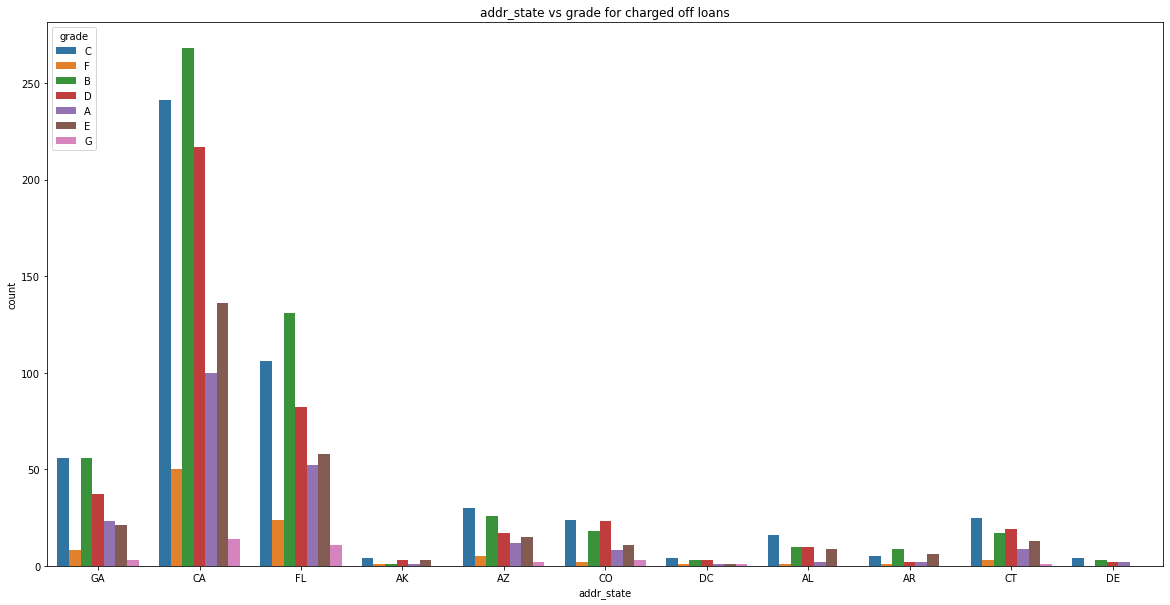

In [61]:
plt.figure(figsize=(20,10))
state = loan_df_cleaned[loan_df_cleaned.loan_status=='Charged Off'].groupby('addr_state')['id'].count().reset_index().loc[:10,'addr_state'].tolist()
data=loan_df_cleaned[(loan_df_cleaned.loan_status=='Charged Off') & (loan_df_cleaned.addr_state.isin(state))]
sns.countplot(x=data['addr_state'],hue=data['grade'],data=data)
plt.title('addr_state vs grade for charged off loans')
plt.show()

#### Insight: More number of charged off applicants are from CA address state. 

#### Recommendation: More rigor in verification process in the state may reduce default.


The below plot is to understand Address state Vs Loan amount

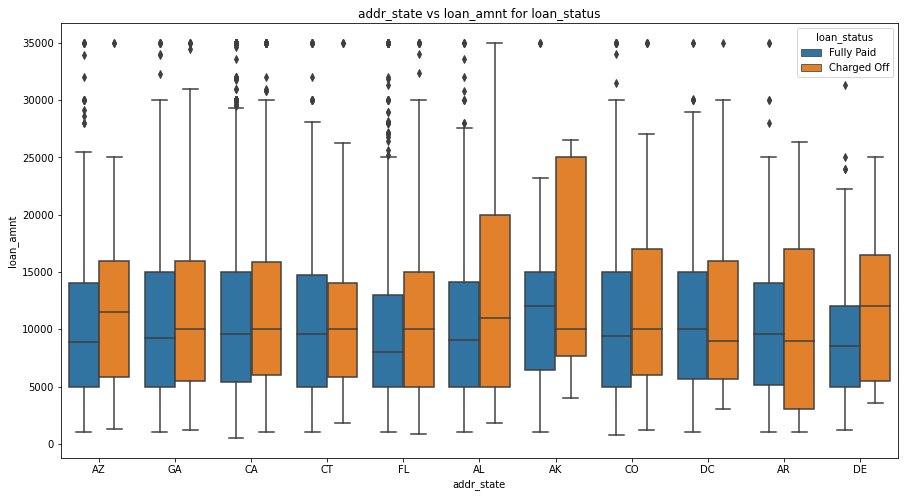

In [62]:
plt.figure(figsize=(15,8))
state = loan_df_cleaned.groupby('addr_state')['id'].count().reset_index().loc[:10,'addr_state'].tolist()
data=loan_df_cleaned[(loan_df_cleaned.addr_state.isin(state))]
sns.boxplot(x=data['addr_state'],hue=data['loan_status'],y=data['loan_amnt'],data=data)
plt.title('addr_state vs loan_amnt for loan_status')
plt.show()

#### Insight: Most of charged off loan applicants from AK state have taken higher loan amounts and  are likely to get defaulted

#### Recommendation: Verification rigor should be increased and number of verification should be increased

The below plot is to understand loan purpose Vs Annual income

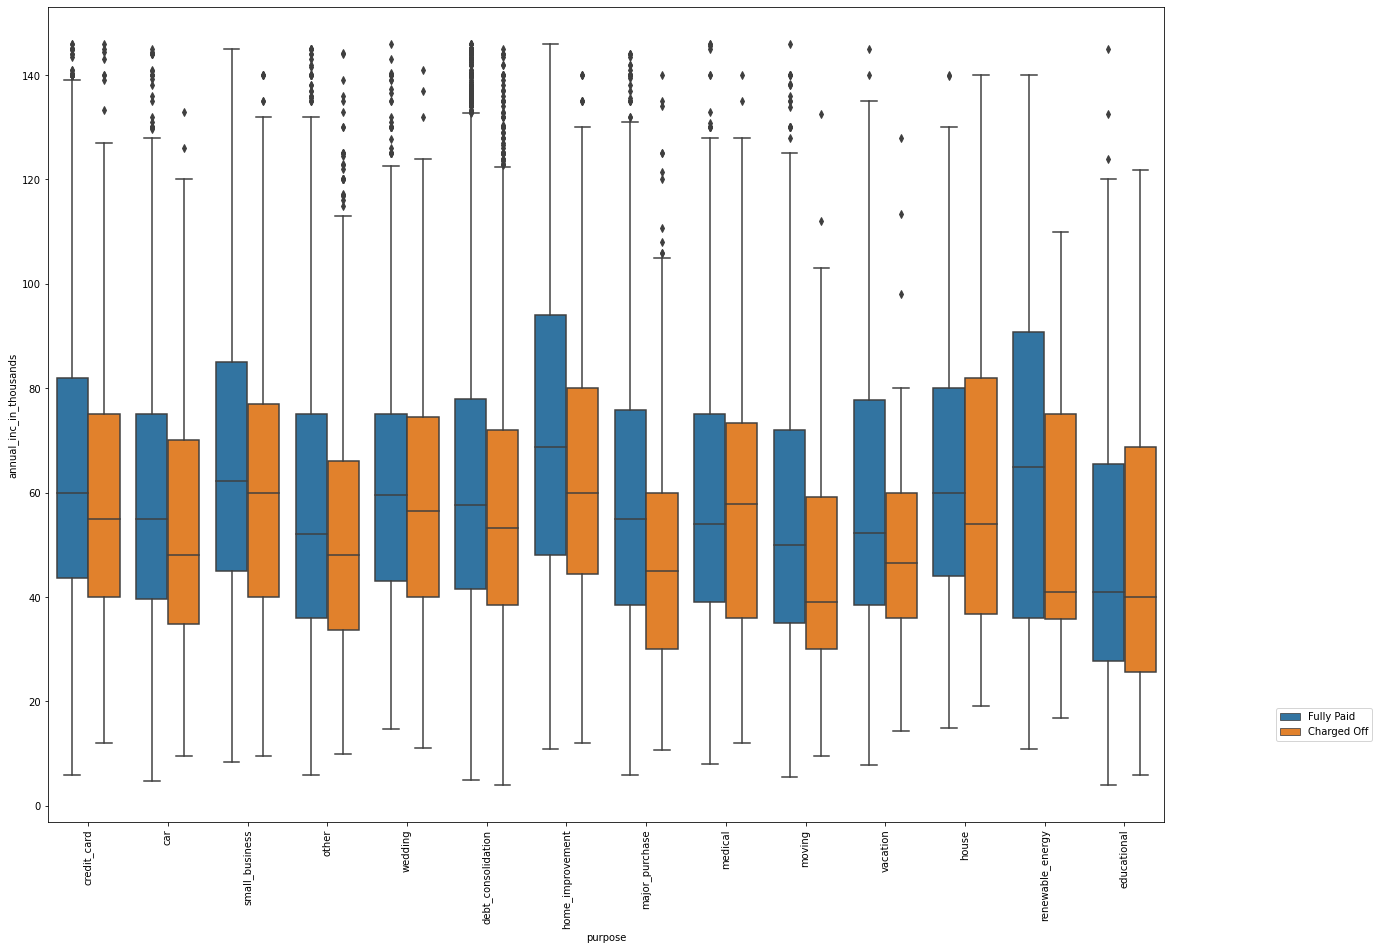

In [63]:
plt.figure(figsize=(20,15))
sns.boxplot(x=loan_df_cleaned['purpose'],y=loan_df_cleaned['annual_inc_in_thousands'],hue=loan_df_cleaned['loan_status'],data=loan_df_cleaned)
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.1))
plt.show()

#### Insight: Most of charged off loan applicants for small business, home improvement, house are mostly falling under annual income range of 35K to 80K.

The below plot is to understand Loan purpose Vs loan amount

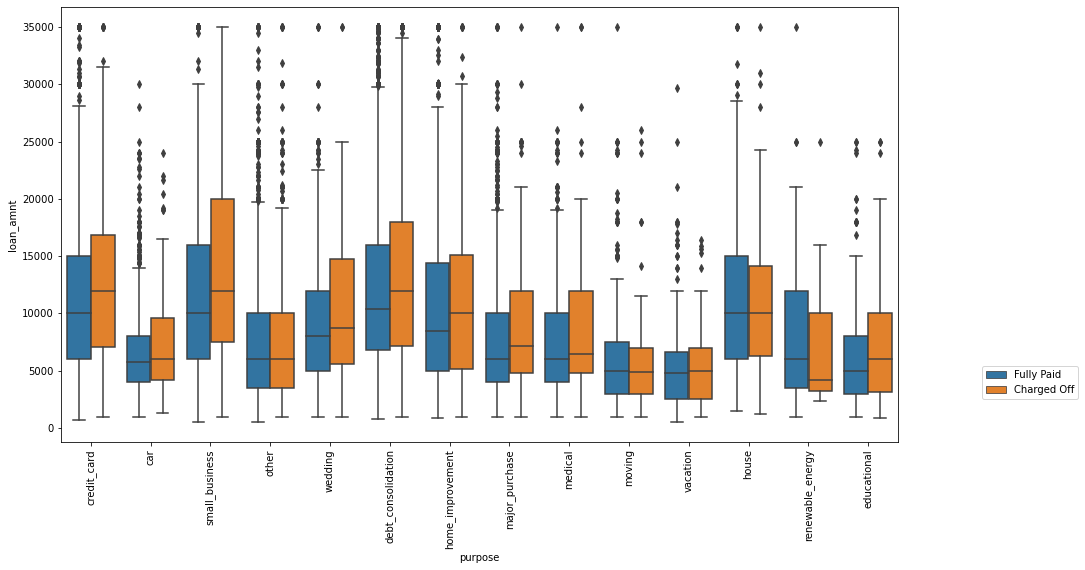

In [64]:
plt.figure(figsize=(15,8))
sns.boxplot(x=loan_df_cleaned['purpose'],y=loan_df_cleaned['loan_amnt'],hue=loan_df_cleaned['loan_status'],data=loan_df_cleaned)
plt.xticks(rotation=90)
plt.legend(loc=(1.1,0.1))
plt.show()

#### Insight: Most of charge off loan applicants for Credit card, small business,Debt consolidation and home improvement are mostly falling under loan amount of 5K to 20K

Creation of interest rate,funded_amnt and installment bins

In [65]:
loan_df_cleaned['int_rate_bins']=pd.cut(loan_df_cleaned['int_rate'],bins=[5,7,9,10,11,12,15,18,20,25])
loan_df_cleaned['funded_amnt_inv_bins']=pd.cut(loan_df_cleaned['funded_amnt_inv'],bins=[0,5000,10000,15000,20000,25000,30000],labels=['0K-5K','6k-10K','11K-15K','16K-20K','21K-25K','25K-30K'])
loan_df_cleaned['installment_bins']=pd.cut(loan_df_cleaned['installment'],bins=[0,100,200,300,400,500,600,700,800,900,1000,1100],labels=['0-100','101-200','201-300','301-400','401-500','501-600','601-700','701-800','801-900','901-1000','1001-1100'])

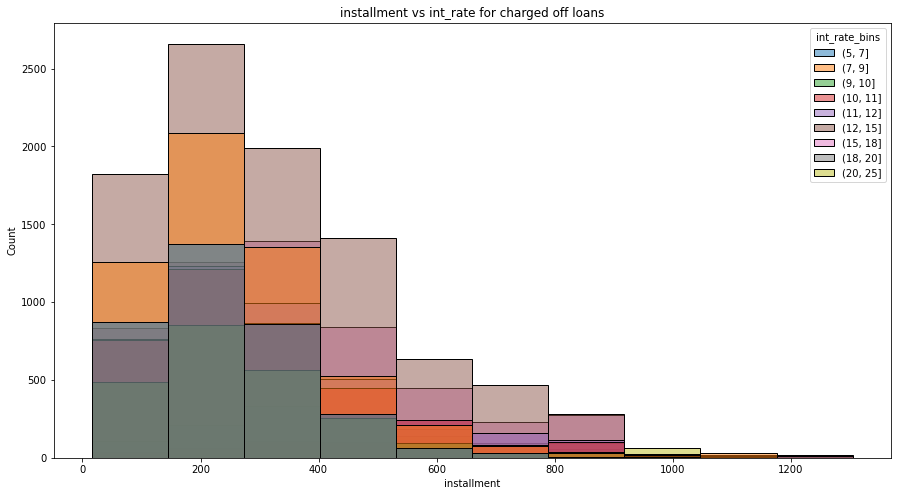

In [66]:
plt.figure(figsize=(15,8))
sns.histplot(x=loan_df_cleaned['installment'],hue=loan_df_cleaned['int_rate_bins'],bins=10,data=loan_df_cleaned[loan_df_cleaned['loan_status']=='Charged Off'])
plt.title('installment vs int_rate for charged off loans')
plt.show()

#### Insight : Most of the charge off loan applicants are paying installments in range of 200 to 300 with int_rate from 9-10%

The below plot is to undersand loan amount Vs installment / interest rate

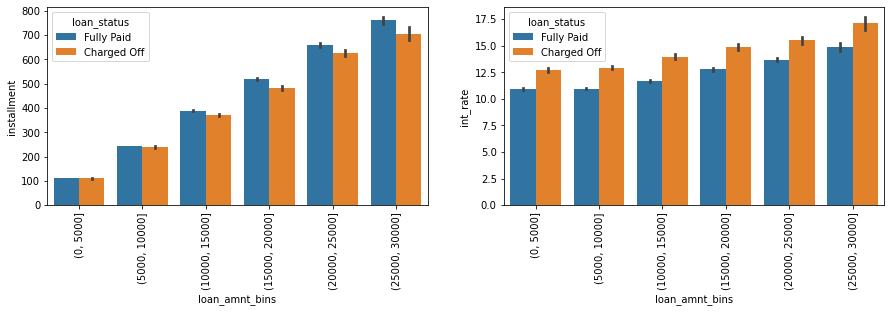

In [67]:
plt.figure(figsize=(15,8))
#sns.catplot(x='loan_amnt_bins',y='installment',hue='loan_status',data=loan_df_cleaned,kind='bar',height=5,aspect=3)
plt.subplot(221)
sns.barplot(x='loan_amnt_bins',y='installment',hue='loan_status',data=loan_df_cleaned)
plt.xticks(rotation=90)
plt.subplot(222)
sns.barplot(x='loan_amnt_bins',y='int_rate',hue='loan_status',data=loan_df_cleaned)
plt.xticks(rotation=90)
plt.show()

#### Insight: Increase in Interest rate and installment is likely to increase number of charged off applicants
#### Interest rate for charge off loans are higher than that of fully paid loans.
#### Applicants taking loan amounts greater than 15K with interest rate greater than 12.5% are likely to default.

The below plot is to understand loan amount vs home ownership

<AxesSubplot:xlabel='home_ownership', ylabel='loan_amnt'>

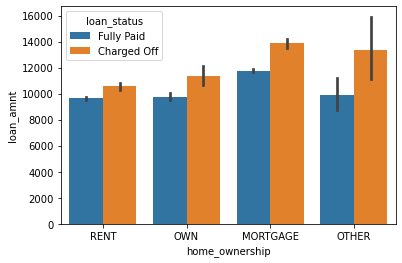

In [68]:
sns.barplot(x='home_ownership',y='loan_amnt',hue='loan_status',data=loan_df_cleaned)

#### Insight:Applicants taking loan for mortgage and loan amount ranging from 14K-16K are likely to default.

<AxesSubplot:xlabel='home_ownership', ylabel='annual_inc_in_thousands'>

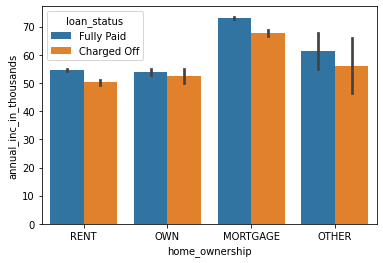

In [69]:
sns.barplot(x='home_ownership',y='annual_inc_in_thousands',hue='loan_status',data=loan_df_cleaned)

#### Insight:Applicants taking loan for mortgage and with annual income ranging from 60K-80K are likely to default.

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

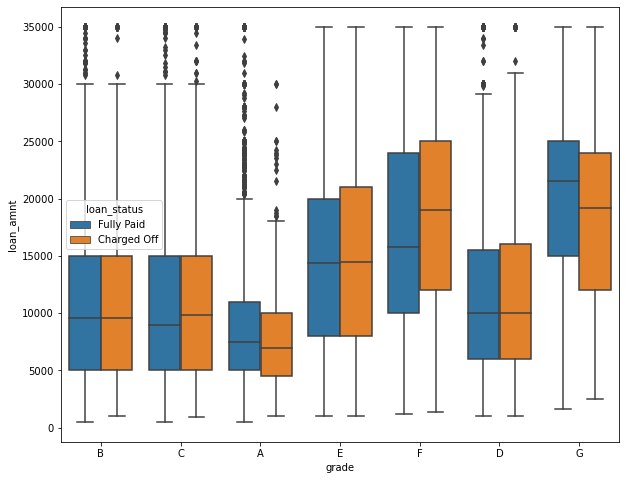

In [70]:
plt.figure(figsize=(10,8))
sns.boxplot(y='loan_amnt',x='grade',hue='loan_status',data=loan_df_cleaned)

#### Insight:Applicants taking F and G grade loans with loan amounts ranging from 14K - 25K are likely to default.

The below plot is to understand Empolyee experience vs Income

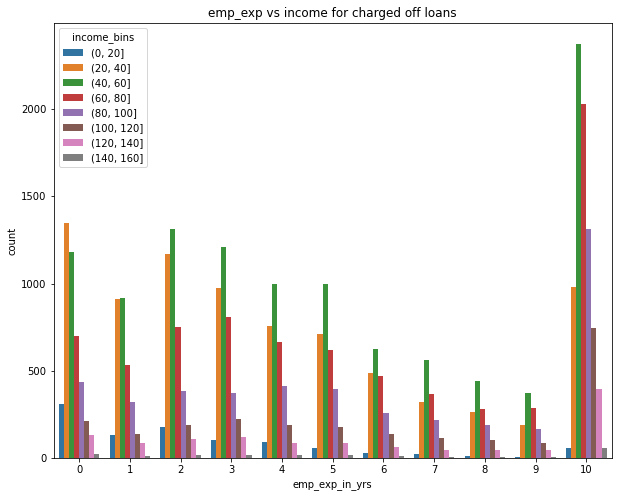

In [71]:
plt.figure(figsize=(10,8))
sns.countplot(x=loan_df_cleaned['emp_exp_in_yrs'],hue=loan_df_cleaned['income_bins'],data=loan_df_cleaned[loan_df_cleaned.loan_status=='Charged Off'])
plt.title('emp_exp vs income for charged off loans')
plt.show()

#### Insights : Most of the charged off loan applicants are falling under 20K-60K income bin irrespective of experience.

##### -The maximum number of loans were taken by employees who have experience of less than or equal to 5 years 

The below plot is to understnad loan amount vs loan term

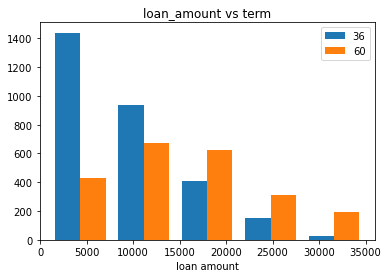

In [72]:
df_term=loan_df_cleaned[(loan_df_cleaned['loan_status']=='Charged Off')]
fig,(ax1)=plt.subplots(1)
ax1.hist([df_term[df_term['term_in_months']==36]['loan_amnt'],df_term[df_term['term_in_months']==60]['loan_amnt']],bins=5,label=['36','60'])
ax1.legend(loc='upper right')
ax1.set_xlabel('loan amount')
ax1.set_title('loan_amount vs term')
plt.show()

#### Insight : Most of the applicants taking less loan amount are opting for 36 months.As the loan_amount is increasing 60 months term
#### is preferred.

#### Applicants taking loan amounts ranging from 10K-20K and having 60 months term are likely to default.

The below plot is to understand loan amount Vs total accounts

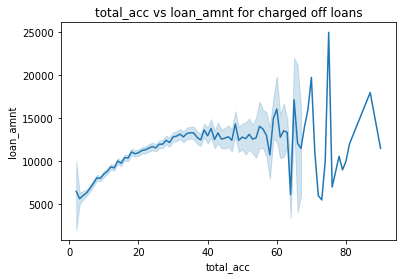

In [73]:
sns.lineplot(loan_df_cleaned.total_acc,loan_df_cleaned.loan_amnt,data=loan_df_cleaned[loan_df_cleaned.loan_status=='Charged Off'])
plt.title('total_acc vs loan_amnt for charged off loans')
plt.show()

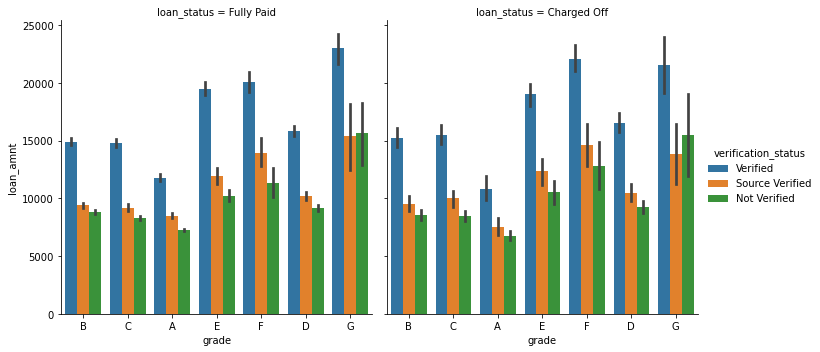

In [74]:
sns.catplot(y='loan_amnt',x='grade',col='loan_status',hue='verification_status',data=loan_df_cleaned,kind='bar')

plt.show()

#### There is nothing we can infer from this plot as for both charged off and fully paid loans the verification process is done .
#### Despite of verification process charge off loans are more.

The below plot is to understand income vs interest rate

<AxesSubplot:xlabel='int_rate_bins', ylabel='annual_inc_in_thousands'>

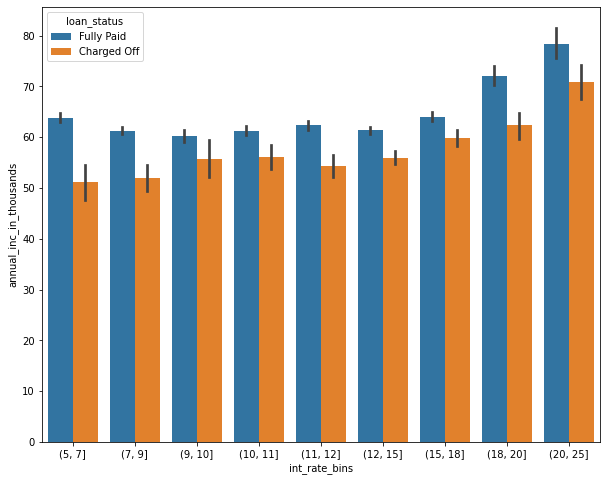

In [75]:
plt.figure(figsize=(10,8))
#sns.barplot(x='income_bins',y='int_rate',hue='loan_status',data=loan_df_cleaned)
sns.barplot(x='int_rate_bins',y='annual_inc_in_thousands',hue='loan_status',data=loan_df_cleaned)

#### Insight : Applicants who are having income >60K and are given loans with interest rate >15% are likely to default.

The below plot is to understand Loan purpose Vs loan amount / Grade

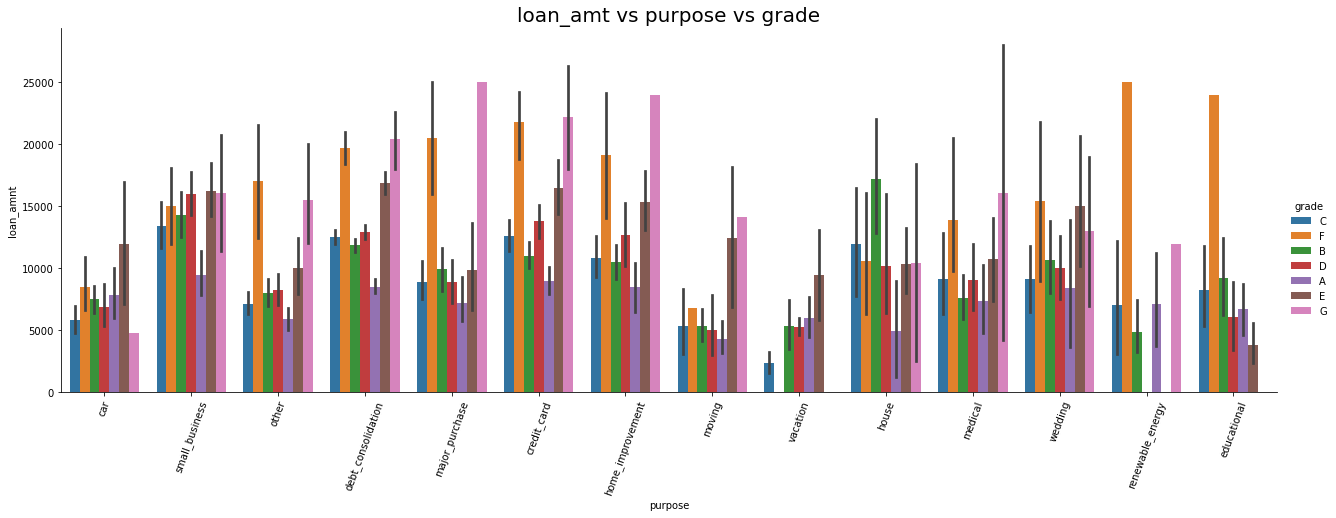

In [76]:
sns.catplot(x='purpose',y='loan_amnt',col='loan_status',hue='grade',data=loan_df_cleaned[loan_df_cleaned.loan_status=='Charged Off'],kind='bar',height=6,aspect=3)
plt.title('loan_amt vs purpose vs grade',fontdict={'fontsize':20})
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=70)

SMALL_SIZE = 10
MEDIUM_SIZE = 25
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.show()

#### Insight - Most of the charge off loan applicants are taking loans for debt_consolidation,small_business,credit_card and home improvement.
#### and loan amounts are ranging from 10k-20K.Majority of charge off loans are G graded for these categories.

### End of Analysis
## Recommendation to Lending company based on defaulters pattern

Majority of loans are fully paid and the charged off loans are approximately 15%

There are many loans (about 43%) which were not verified and also significant  number of verified loans were charged off. It is recommended to review the verification process and improve review rigor. Also it is recommended to increase the number of verifications.

Loan applicants taking loan amounts greater than 15K with interest rate greater than 12.5% are likely to default. Applicants who are having income >60K and are given loans with interest rate >15% are likely to default.  Enhanced mechanism/process is required to control the default if interest rate is higher. Applicants taking loan amount from 10K to 12K are likely to default. 

Number of charged off loans are less only for Grade A compared to paid off loans. For grade B, percentage of charged off loans is high. For grades C, D, E, F and G, percentage of charged off loans are more than paid loans. Applicants taking F and G grade loans with loan amounts ranging from 14K to 25K are likely to default.  The grading of loan applicants needs to be refined/modified to take correct decision before sanctioning loans.

Loans for Debt consolidations, Small business, others purposes and credit cards have approximately 78% of charged off applicants out of all charged off applicants. Most of charged off loan applicants for Credit card, small business, Debt consolidation and home improvement are mostly falling under loan amount of 5K to 20K and income range of 35K to 80K .  Probability of defaulting loans for these purposes is high. Additional checks may be required before sanctioning loan for these purposes.

Most of loan applicants are from income range of 20K to 80K for charged off loans taking loan amount in range of 5K-10K.  It is recommended to focus more on applicants whose income are ranging from 20K to 80K and improve control process to reduce defaults.

Number of charged off and fully paid loans are increasing every year and also every month most of the time. Corrective action is required to reduce increase of the charged off applicants.

Number of charged off loans are more (about 40% of fully paid loans) when loan term is 60 months. It is recommended to have better control measures to minimize default loans taken with 60 months loan term

Most of Loan applicants from AK State have taken higher loan amount and are likely to get defaulted. More number of charged off applicants are from CA state. Verification rigor should be increased and number of verification should be increased in the states.

Applicants having experience greater than 5 years and taking loan amounts greater than 15K are likely to default. Most of the charged off loan applicants are falling under 20K-60K income bin irrespective of experience. Loan amount can be reduced to reduce defaults.

Applicants taking loan for mortgage and loan amount ranging from 14K-16K  and also Applicants taking loan for mortgage  with annual income ranging from 60K-80K are likely to default. Loan amount may be reduced  for mortgage loans to reduce defaults.

Applicants with DTI  of 13 to 14 and paying installment in the range of 300 to 350 are likely to be defaulted.  Loan amount may be reduced to avoid defaults.
